# **AP155 Lab Assignment**
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.




### Student Information

_Full Name (Last Name, First Name)_: Nathan&nbsp;Gabriel&nbsp;C.&nbsp;Danac\
_Student No._: 2021-12517\
_Section_: THU-HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Nathan Gabriel C. Danac**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [ ]:
#Importing numpy because I think we'll be doing a lot of math.
import numpy as np

#Writing a function to find the percent error, since we'll be doing that often.
def pct_error(expt, theo):
  return abs((expt - theo)/theo)

### PROBLEM 1
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(10 pts.)*

2. What are the percentage errors of your answers in (1)? *(10 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(5 pts.)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(5 pts.)*

The first step is to define the function $f(x)$.

Evaluating the definite integral, we can also find the theoretical value:
$$\int_0^5 2x^4 + 3x^2 + 4x + 5 dx = 1450$$



In [ ]:
#Defining f(x)
def f(x):
  return 2*x**4 + 3*x**2 + 4*x + 5

#Setting our theoretical value
num = 1450

The first step is to get the width $h$ of each slice.
$$h = \frac{b - a}{N}$$
The area of each slice is given by
$$A_k = \frac{1}{2}h[f(a + (k - 1)h) + f(a + kh)]$$
We can find the integral, or the area under the entire curve, by taking the summation of the areas of the slices
$$\sum_{k = 1}^N A_k = h[\frac{1}{2}f(a)+\frac{1}{2}f(b)+\sum_{k=1}^N f(a + kh)]$$
We can evaluate this summation in three steps
1.   Set the initial value $s = \frac{1}{2}f(a) + \frac{1}{2}f(b)$
2.   Add the summation $\sum_{k=1}^N f(a + kh)$ to $s$
3.   Multiply $s * h$



In [ ]:
def trap(a, b, func, N):
  #Find the width of each slice
  h = (b - a)/N

  #Set the intial value of s
  s = 0.5*func(a) + 0.5*func(b)

  #Add the summation
  for i in range(1, N):
    s += func(a+i*h)

  #Multiply by h
  return h*s


We can write a function to repeat the integral using a particular method and a different number of slices, as well as evaluate the percent error.

In [ ]:
#No. of slices
slices_arr = [10, 100, 1000]

def integrate(a, b, integrand, method, slices):
  for k in slices:
    #Evaluate the integral
    I = method(0, 5, integrand, k)
    #Take the % error
    err = pct_error(I, num)

    #Output the integral and the percent error
    print("Using " + str(k) + " slices, the integral of f(x) is " + str(I) + ", which has a percent error of " + str(err) + "%")

  return

#Using this function for the trapezoidal method
integrate(0, 5, f, trap, slices_arr)

Using 10 slices, the integral of f(x) is 1471.4375, which has a percent error of 0.01478448275862069%
Using 100 slices, the integral of f(x) is 1450.2145812500003, which has a percent error of 0.00014798706896569988%
Using 1000 slices, the integral of f(x) is 1450.0021458331234, which has a percent error of 1.4798849127240327e-06%


The next method, Simpson's rule, is described by
$$\int_{-h}^h (Ax^2 + Bx + C)\ dx = \frac{2}{3}Ah^2 + 2Ch = \frac{1}{3}h[f(-h) + 4f(0) + f(h)]$$
Approximating this integral,
$$I(a, b) = \frac{1}{3}h[f(a) + f(b) + 4\sum_{k\ odd} f(a + kh) + 2\sum_{k\ even} f(a + kh)$$
We can evaluate this integral using the following steps:
1.   Get the width $h$ of each slice
2.   Set the initial value $s = f(a) + f(b)$
3.   Add the summation for odd values of $k$ to $s$
4.   Add the summation for even values of $k$ to $s$
5.   Multiply $s * \frac{1}{3}h$



In [ ]:
def simp(a, b, func, N):
  #Get the width of each slice
  h = (b-a)/N

  #Set initial value of s
  s = func(a) + func(b)
  #Evaluate the summation for odd values
  for k in range(1,N,2):
      s += 4*func(a+k*h)
  #Evaluate the summation for even values
  for k in range(2,N,2):
      s += 2*func(a+k*h)
  #Multiply by h/3
  s *= (1./3)*h
  return(s)

#Use the integrate function defined earlier
integrate(0, 5, f, simp, slices_arr)

Using 10 slices, the integral of f(x) is 1450.0833333333333, which has a percent error of 5.7471264367763824e-05%
Using 100 slices, the integral of f(x) is 1450.0000083333337, which has a percent error of 5.747126657485657e-09%
Using 1000 slices, the integral of f(x) is 1450.000000000834, which has a percent error of 5.75176994155707e-13%


### PROBLEM 2

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(10 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(20 pts.)*

Defining the functions gaussxw and gaussxwab from Appendix E of Newmann,

In [ ]:
from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):
  # Initial approximation to roots of the Legendre polynomial
  a = linspace(3,4*N-1,N)/(4*N+2)
  x = cos(pi*a+1/(8*N*N*tan(a)))
  # Find roots using Newton's method
  epsilon = 1e-15
  delta = 1.0
  while delta>epsilon:
    p0 = ones(N,float)
    p1 = copy(x)
    for k in range(1,N):
      p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
    dp = (N+1)*(p0-x*p1)/(1-x*x)
    dx = p1/dp
    x -= dx
    delta= max(abs(dx))
  # Calculate the weights
  w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
  return x,w

def gaussxwab(a, b, N):
  x,w = gaussxw(N)
  return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In Gaussian quadrature, we can evaluate an integral using the weights $x_k'$ and $w_k'$
$$\int_a^b f(x)\ dx ≈ \sum_{k = 1}^N w_k'f(x_k')$$

In [16]:
def gauss(a, b, func, N):
  #Find the weights xp and wp
  xp, wp = gaussxwab(a, b, N)

  #Evaluating the summation
  return sum(wp * func(xp))

integrate(0, 5, f, gauss, [3])

Using 3 slices, the integral of f(x) is 1450.000000000002, which has a percent error of 1.4112848820614403e-15%


### PROBLEM 3

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(20 pts.)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(20 pts.)*

Since we set $m = 1$, we can simplify our function
$$T(a) = \sqrt{8}\int_0^a \frac{dx}{\sqrt{V(a) - V(x)}}$$

To evaluate this integral, we can just use our function for Gaussian quadrature from the previous problem. However, we have to define our integrand again, since it is no longer $f(x)$ and is instead dependent on the amplitude $a$.



In [ ]:
#Define the potential function
def V(x):
  return x**4

#Define the period function
def T(a):
  #We need to define a function for the integrand within our function for the period, since it is dependent on the amplitude
  def integrand(x):
    return 1/np.sqrt(V(a) - V(x))

  #Evaluate the period using the gauss function from the previous problem
  return np.sqrt(8) * gauss(0, a, integrand, 20)

Lastly, creating the graph for amplitude vs. time,

<ipython-input-12-6e3174094298>:9: RuntimeWarning: divide by zero encountered in divide
  return 1/np.sqrt(V(a) - V(x))
<ipython-input-9-6f7f05759eac>:6: RuntimeWarning: invalid value encountered in multiply
  return sum(wp * func(xp))


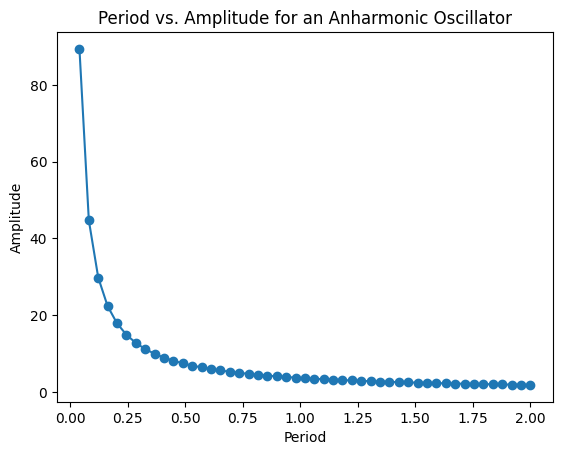

In [ ]:
#Visualizing!
from matplotlib import pyplot as plt

def graph(a, b, N):
  #Create the initial array for the amplitudes
  x = np.zeros(N)
  #Create the initial array for the periods
  y = np.zeros(N)

  #Find the interval between each data point
  h = (b - a)/(N - 1)

  #Define the amplitude and period at each data point
  for i in range(N):
    #Provide even spacing between all chosen points of amplitude
    j = a + i*h
    x[i] = j
    #Evaluate the period at each amplitude
    y[i] = T(j)

  #Graphing
  plt.plot(x, y, "-o")
  #Setting axis labels and chart title
  plt.xlabel("Period")
  plt.ylabel("Amplitude")
  plt.title("Period vs. Amplitude for an Anharmonic Oscillator")

  return

#Running our function
graph(0, 2, 50)

#Displaying our graph
plt.show()